# Visualizing Evaluation 1

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

%matplotlib inline

Global Variables

In [2]:
data_path = '/data/nir_data/2017_05_22/NoSpectralCorrection/results/training03_tiedStructuredImproved/Evaluation.pickle'

plt.rcParams['figure.figsize'] = 15,5

Loading the evaluation result.

In [3]:
with open(data_path, 'rb') as f:
    evaluation_data = pickle.load(f)

## Input and Output Characteristics

Overall input and output value distribution.

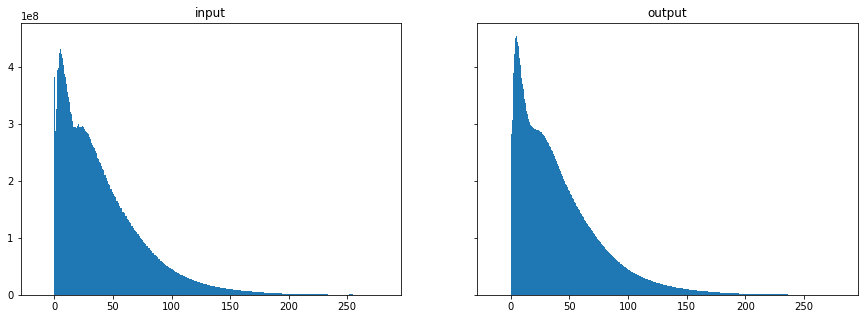

In [4]:
hist_means = 0.5 * (evaluation_data['input_hist_edges'][1:] + evaluation_data['input_hist_edges'][:-1])
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].bar(hist_means, evaluation_data['input_hist'][-1], width=(hist_means[1]-hist_means[0]))
ax[0].set_title('input')
ax[1].bar(hist_means, evaluation_data['output_hist'][-1], width=(hist_means[1]-hist_means[0]))
ax[1].set_title('output')
plt.show()

Now show the same distribution for each spectral band.

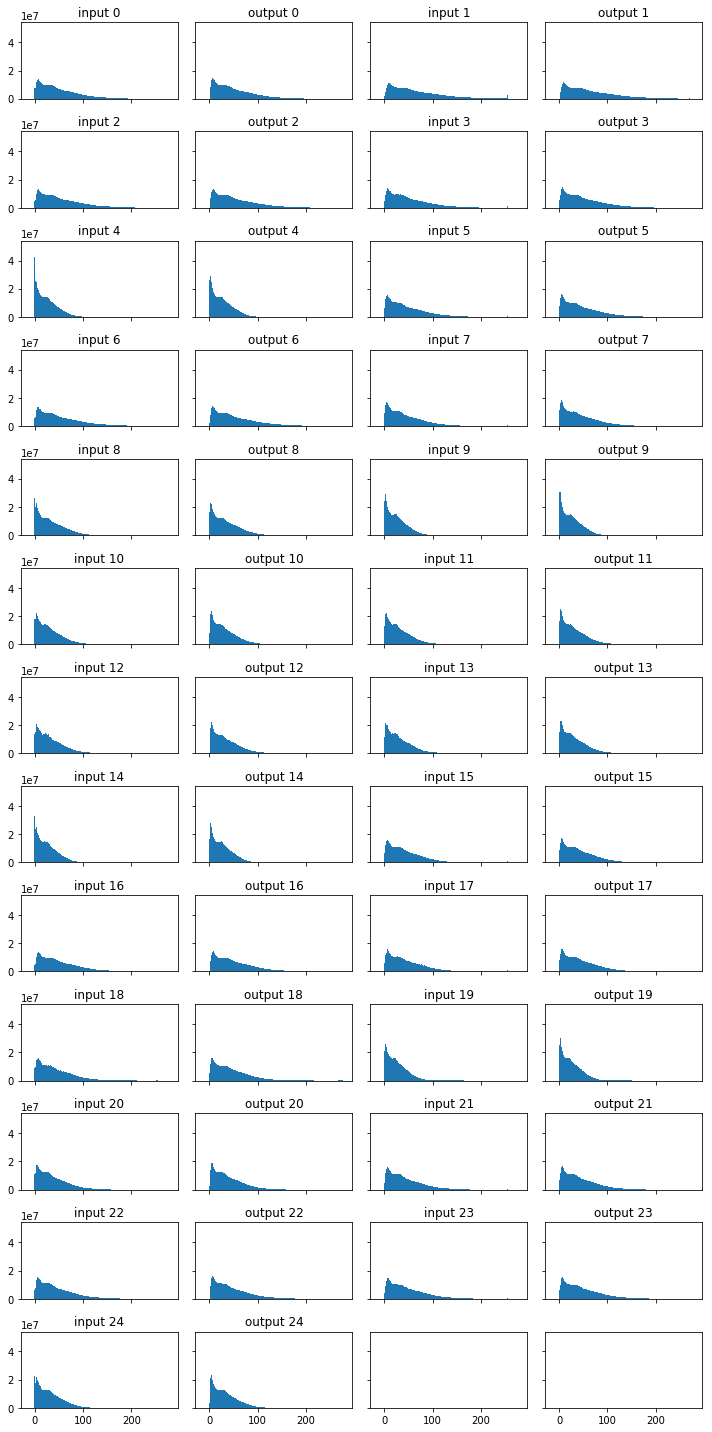

In [5]:
plt.rcParams['figure.figsize'] = 10,20
fig, ax = plt.subplots(13, 4, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    if i > 49:
        continue
    elif i % 2 == 0:
        target.item().bar(hist_means, evaluation_data['input_hist'][i//2], width=(hist_means[1]-hist_means[0]))
        target.item().set_title('input {}'.format(i//2))
    else:
        target.item().bar(hist_means, evaluation_data['output_hist'][i//2], width=(hist_means[1]-hist_means[0]))
        target.item().set_title('output {}'.format(i//2))

plt.tight_layout();

Now inspect the distribution of mean and standard deviation of the input and output data.

Starting with the mean values overall.

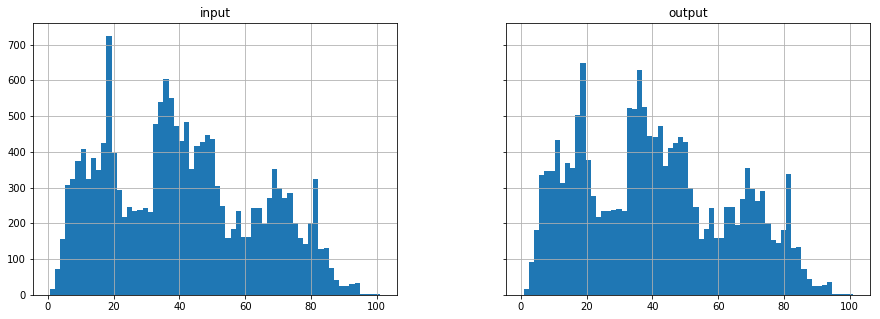

In [6]:
plt.rcParams['figure.figsize'] = 15,5
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
pd.DataFrame(evaluation_data['input_mean'].T[-1]).hist(bins=64, ax=ax[0])
ax[0].set_title('input')
pd.DataFrame(evaluation_data['output_mean'].T[-1]).hist(bins=64, ax=ax[1])
ax[1].set_title('output');

Now show the same distribution for each band.

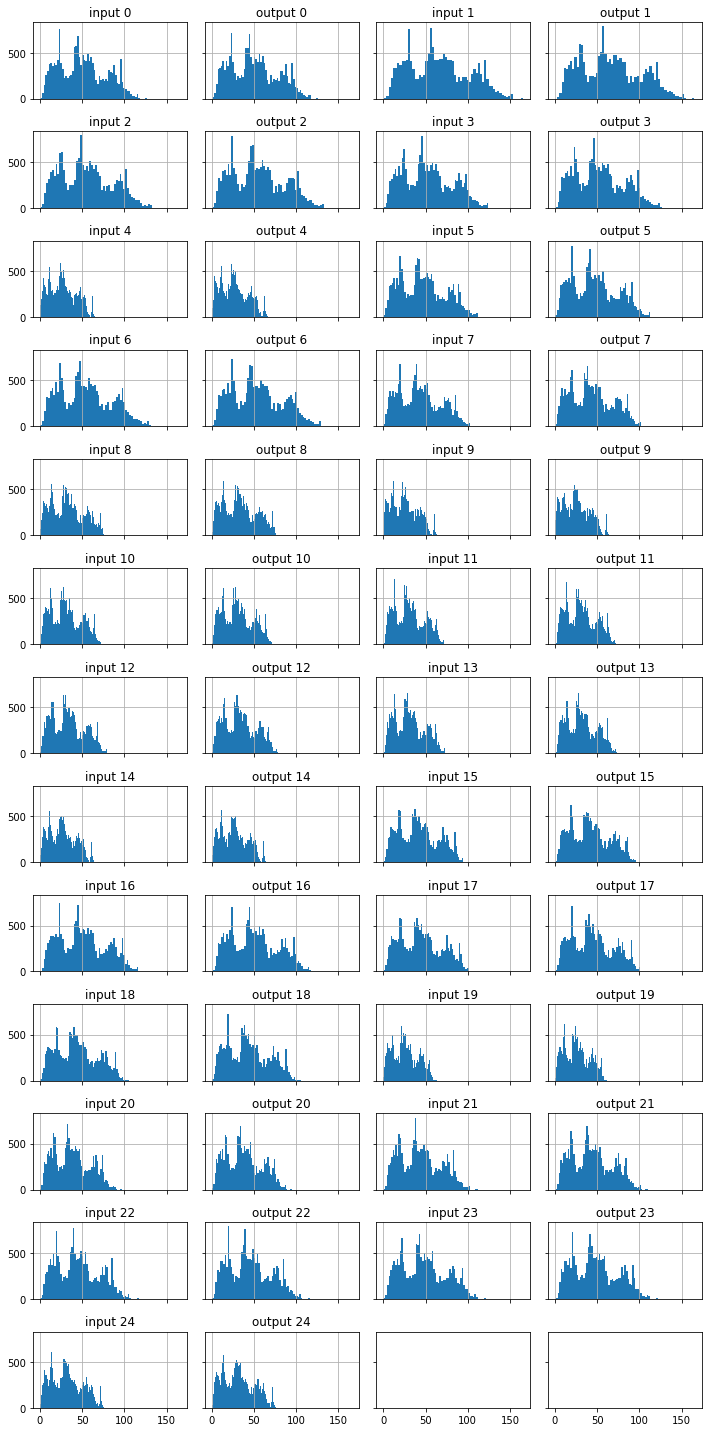

In [7]:
plt.rcParams['figure.figsize'] = 10,20
fig, ax = plt.subplots(13, 4, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    if i > 49:
        continue
    elif i % 2 == 0:
        pd.DataFrame(evaluation_data['input_mean'].T[i//2]).hist(bins=64, ax=target.item())
        target.item().set_title('input {}'.format(i//2))
    else:
        pd.DataFrame(evaluation_data['output_mean'].T[i//2]).hist(bins=64, ax=target.item())
        target.item().set_title('output {}'.format(i//2))
plt.tight_layout();

Now inspect the overall standard deviation.

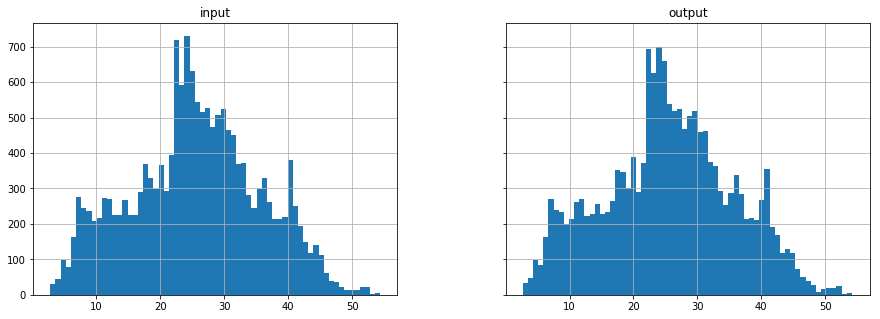

In [8]:
plt.rcParams['figure.figsize'] = 15,5
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
pd.DataFrame(evaluation_data['input_sigma'].T[-1]).hist(bins=64, ax=ax[0])
ax[0].set_title('input')
pd.DataFrame(evaluation_data['output_sigma'].T[-1]).hist(bins=64, ax=ax[1])
ax[1].set_title('output');

Now show the same distribution for each band.

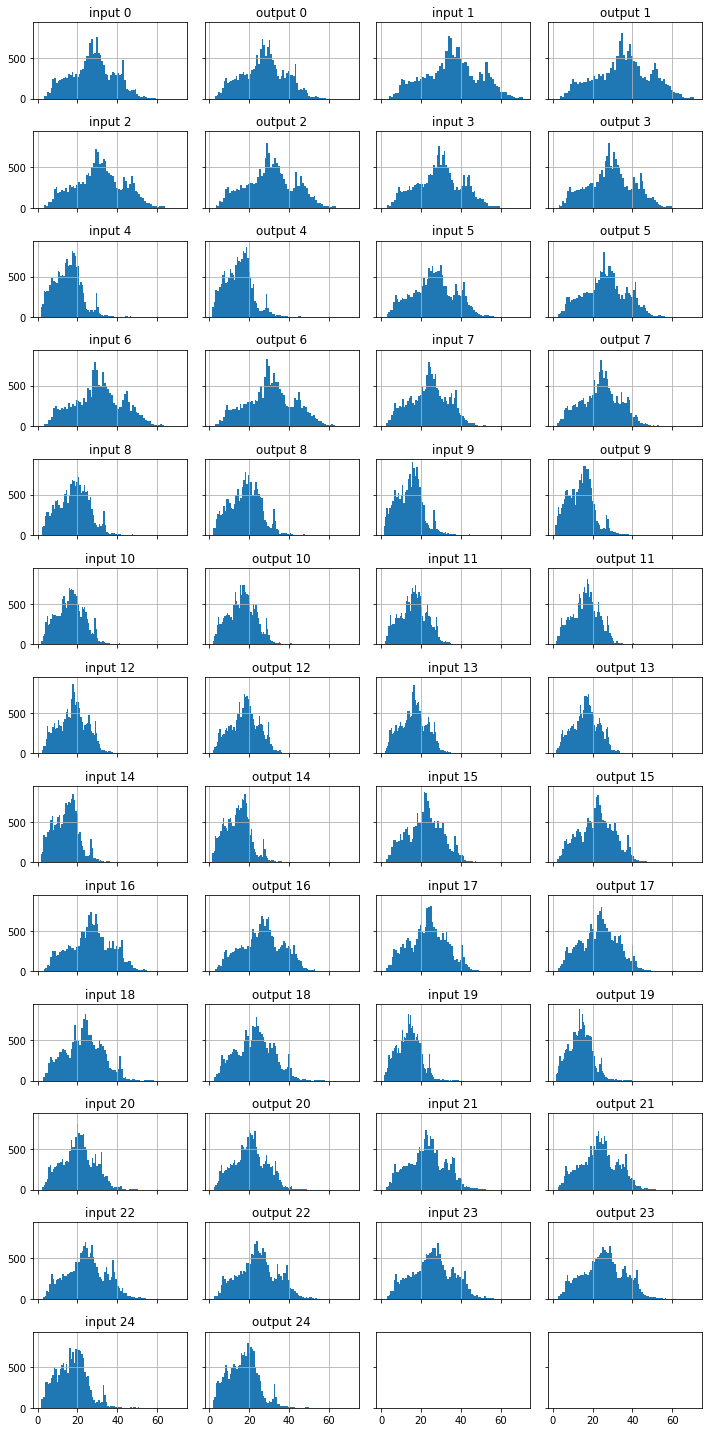

In [9]:
plt.rcParams['figure.figsize'] = 10,20
fig, ax = plt.subplots(13, 4, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    if i > 49:
        continue
    elif i % 2 == 0:
        pd.DataFrame(evaluation_data['input_sigma'].T[i//2]).hist(bins=64, ax=target.item())
        target.item().set_title('input {}'.format(i//2))
    else:
        pd.DataFrame(evaluation_data['output_sigma'].T[i//2]).hist(bins=64, ax=target.item())
        target.item().set_title('output {}'.format(i//2))
plt.tight_layout();

## Error Characteristics

Now inspect the reconstruction error in the same way starting with the overall value distribution.

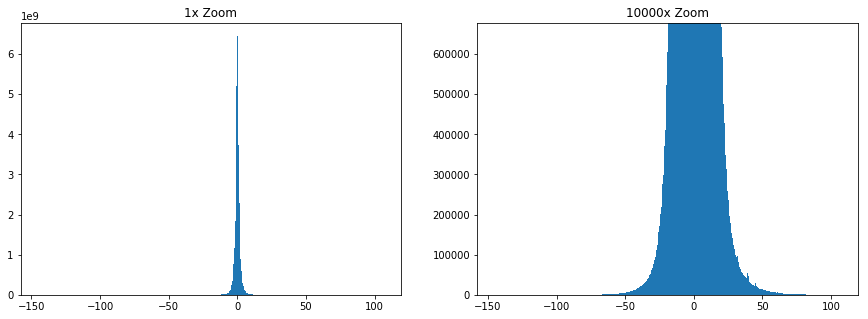

In [10]:
plt.rcParams['figure.figsize'] = 15,5

hist_means = 0.5 * (evaluation_data['error_hist_edges'][1:] + evaluation_data['error_hist_edges'][:-1])
plt.subplot(121)
plt.bar(hist_means, evaluation_data['error_hist'][-1], width=(hist_means[1]-hist_means[0]))
plt.title('1x Zoom')
y_max = plt.ylim()[1]
plt.subplot(122)
plt.bar(hist_means, evaluation_data['error_hist'][-1], width=(hist_means[1]-hist_means[0]))
plt.ylim(0, y_max / 10000)
plt.title('10000x Zoom')
plt.show()

Now plot the error value distribution for each spectral band.

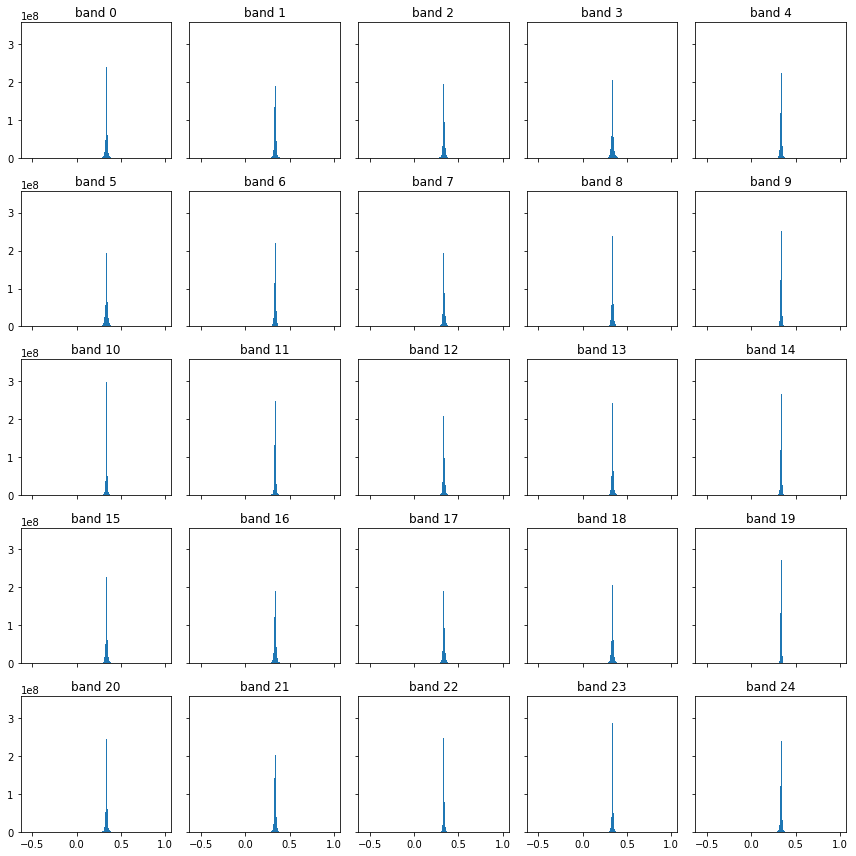

In [22]:
plt.rcParams['figure.figsize'] = 12,12
fig, ax = plt.subplots(5, 5, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    target.item().bar(hist_means, evaluation_data['error_hist'][i], width=(hist_means[1]-hist_means[0]))
    target.item().set_title('band {}'.format(i))

plt.tight_layout();

The overall mean distribution between the reconstruction errors of each image is plotted below.

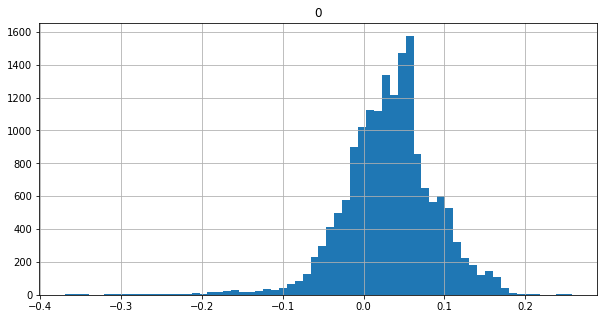

In [12]:
plt.rcParams['figure.figsize'] = 10,5
pd.DataFrame(evaluation_data['error_mean'].T[-1]).hist(bins=64);

Now show the same distribution for each band.

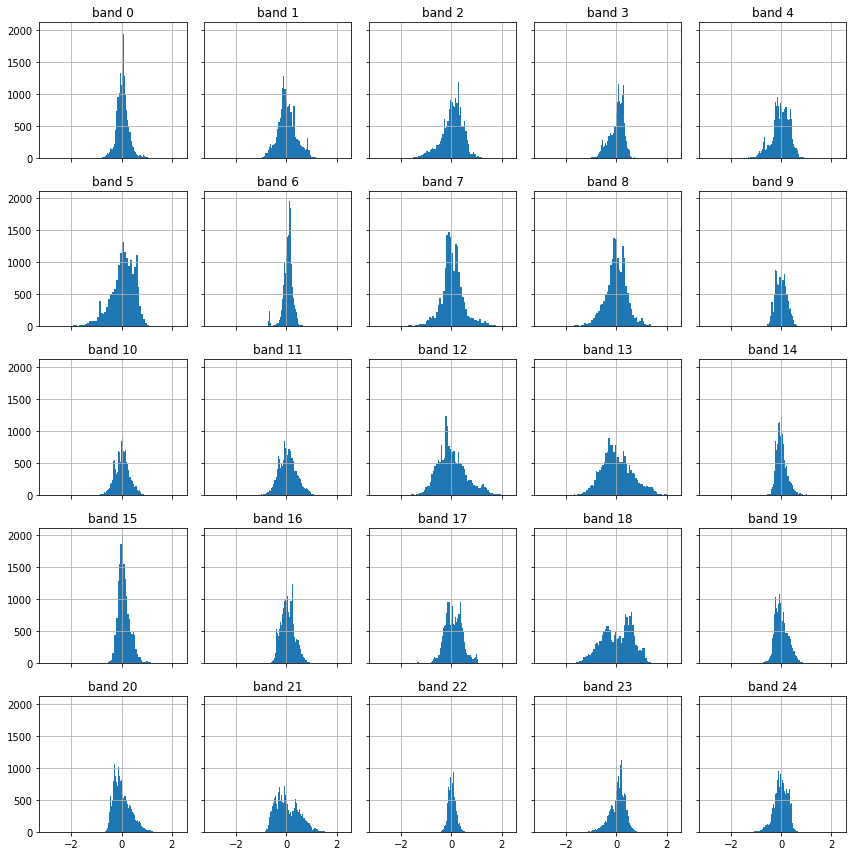

In [13]:
plt.rcParams['figure.figsize'] = 12,12
fig, ax = plt.subplots(5, 5, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    pd.DataFrame(evaluation_data['error_mean'].T[i]).hist(bins=64, ax=target.item())
    target.item().set_title('band {}'.format(i))
plt.tight_layout();

Now inspect the overall standard deviation.

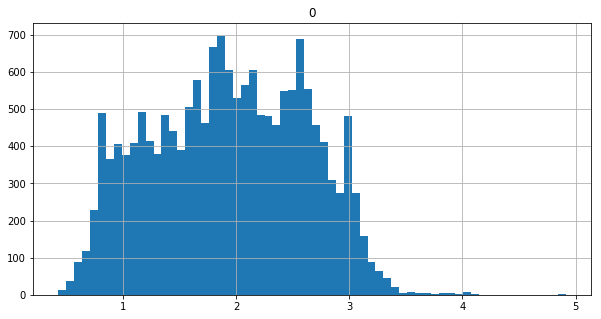

In [14]:
plt.rcParams['figure.figsize'] = 10,5
pd.DataFrame(evaluation_data['error_sigma'].T[-1]).hist(bins=64);

Now show the same distribution for each band.

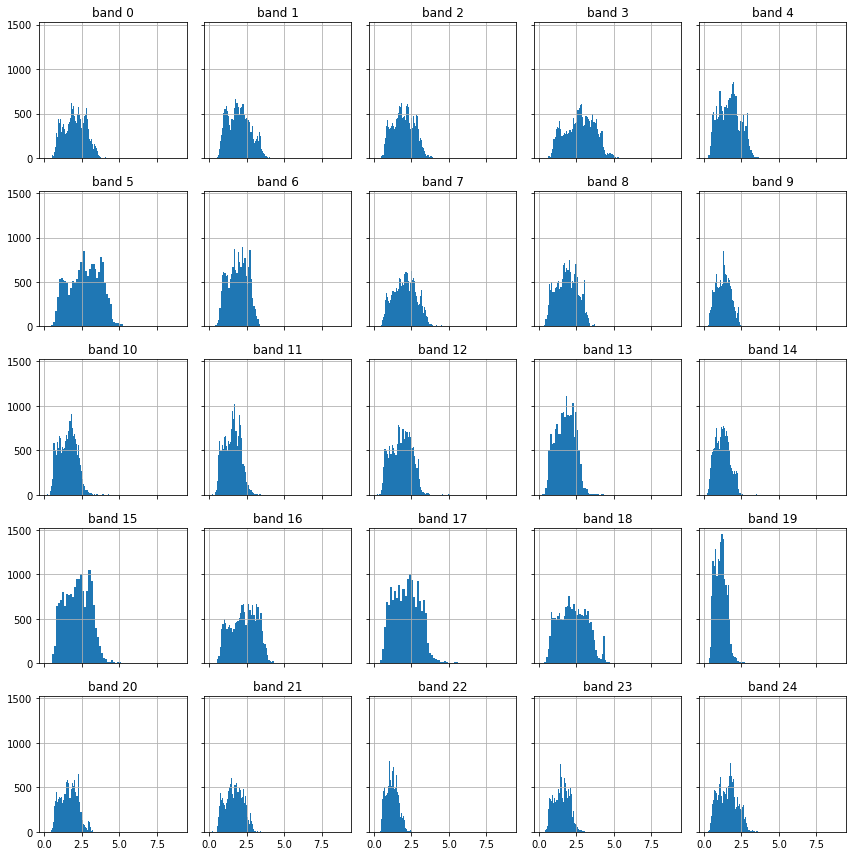

In [15]:
plt.rcParams['figure.figsize'] = 12,12
fig, ax = plt.subplots(5, 5, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    pd.DataFrame(evaluation_data['error_sigma'].T[i]).hist(bins=64, ax=target.item())
    target.item().set_title('band {}'.format(i))
plt.tight_layout();

# Latent Data

The last data evaluated here is the encoded data.

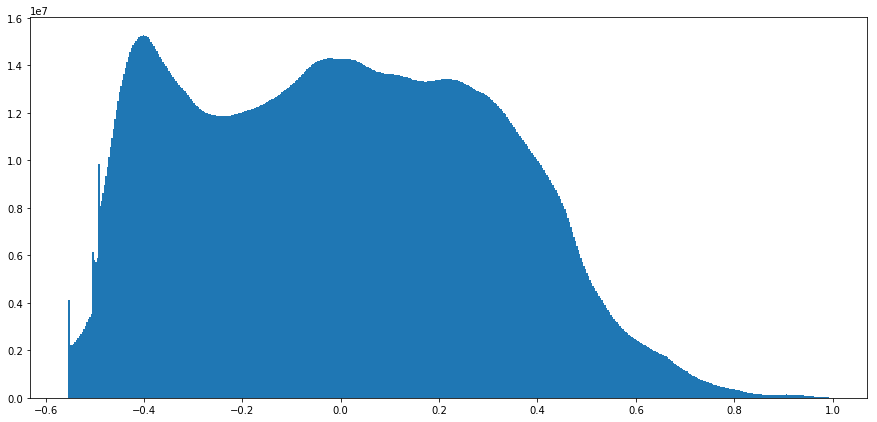

In [16]:
plt.rcParams['figure.figsize'] = 15,7
hist_means = 0.5 * (evaluation_data['latent_hist_edges'][1:] + evaluation_data['latent_hist_edges'][:-1])
plt.bar(hist_means, evaluation_data['latent_hist'][-1], width=(hist_means[1]-hist_means[0]));

Now plot the error value distribution for each spectral band.

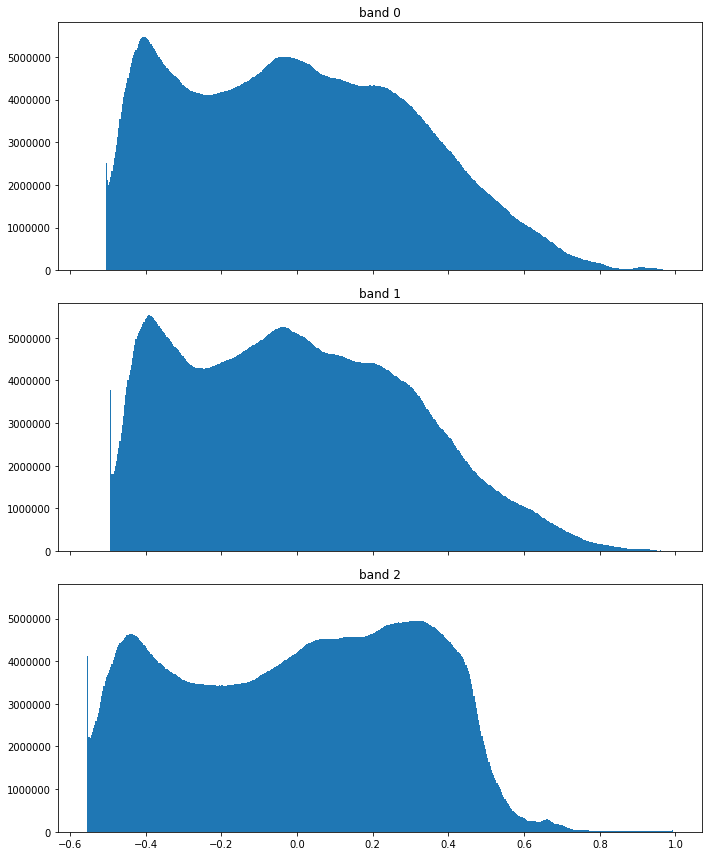

In [17]:
plt.rcParams['figure.figsize'] = 10,12
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    target.item().bar(hist_means, evaluation_data['latent_hist'][i], width=(hist_means[1]-hist_means[0]))
    target.item().set_title('band {}'.format(i))

plt.tight_layout();

The overall mean distribution between the reconstruction errors of each image is plotted below.

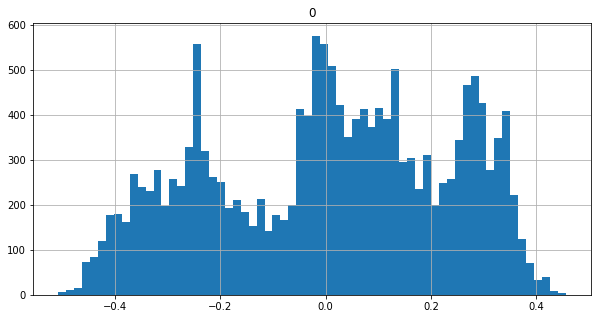

In [18]:
plt.rcParams['figure.figsize'] = 10,5
pd.DataFrame(evaluation_data['latent_mean'].T[-1]).hist(bins=64);

Now show the same distribution for each band.

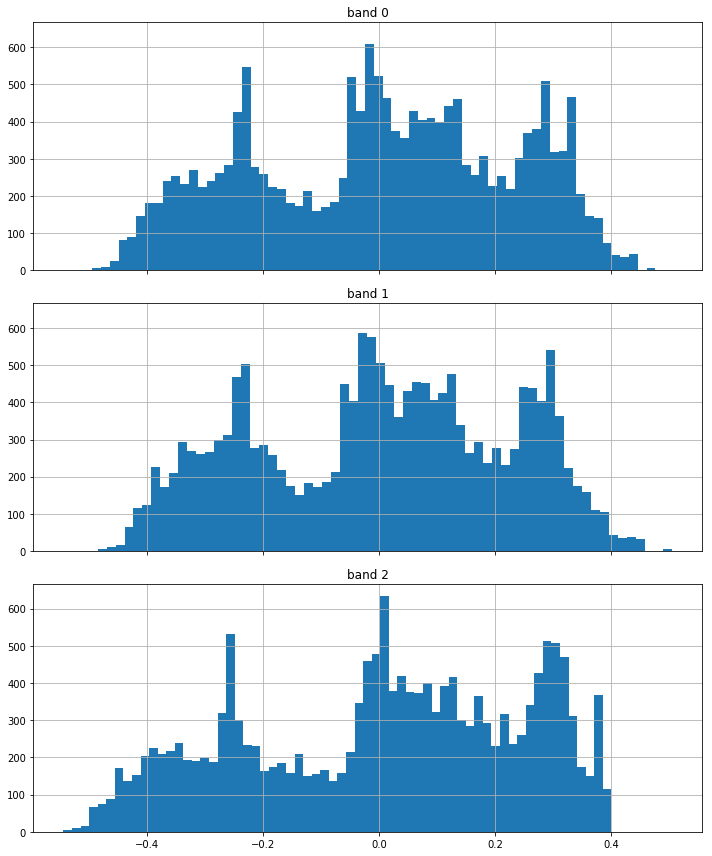

In [19]:
plt.rcParams['figure.figsize'] = 10,12
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    pd.DataFrame(evaluation_data['latent_mean'].T[i]).hist(bins=64, ax=target.item())
    target.item().set_title('band {}'.format(i))
plt.tight_layout();

Now inspect the overall standard deviation.

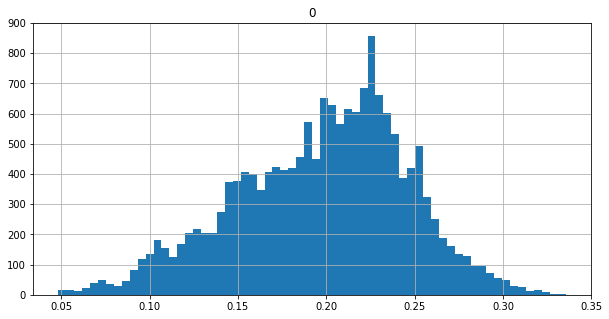

In [20]:
plt.rcParams['figure.figsize'] = 10,5
pd.DataFrame(evaluation_data['latent_sigma'].T[-1]).hist(bins=64);

Now show the same distribution for each band.

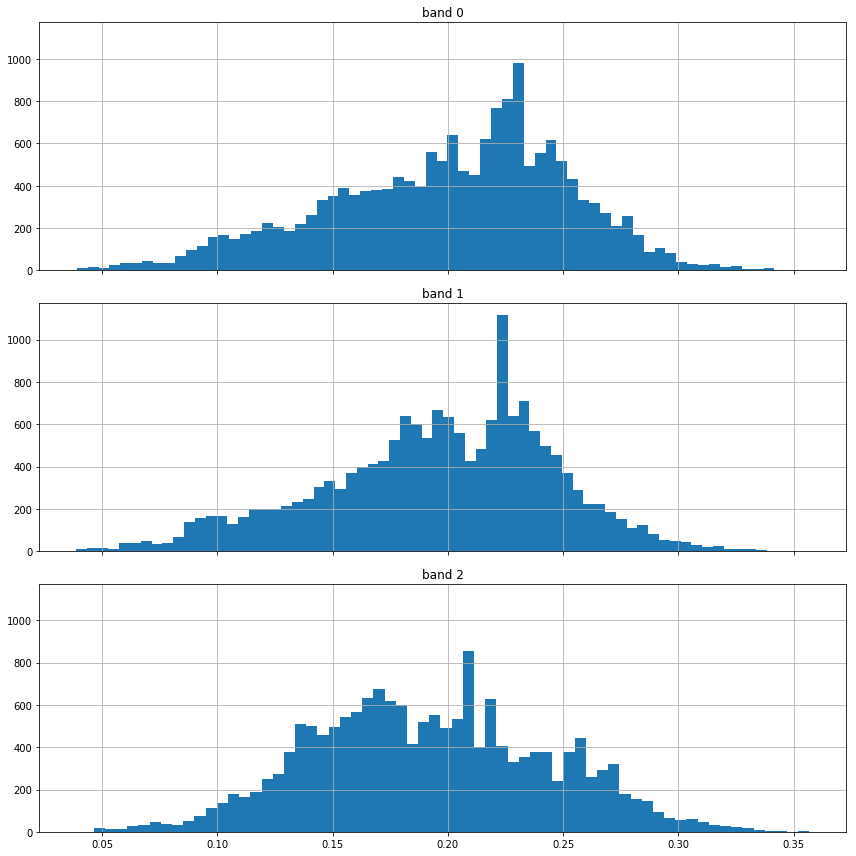

In [21]:
plt.rcParams['figure.figsize'] = 12,12
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i, target in enumerate(np.nditer(ax, flags=['refs_ok'])):
    pd.DataFrame(evaluation_data['latent_sigma'].T[i]).hist(bins=64, ax=target.item())
    target.item().set_title('band {}'.format(i))
plt.tight_layout();